In [77]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from scipy.stats import gaussian_kde

In [2]:
dataset_path = Path("../150_190000")
dataset_csv = {'train': dataset_path / "train_dataset.csv",
              'val': dataset_path / "val_dataset.csv",
              'test': dataset_path / "test_dataset.csv"}

df = {key: pd.read_csv(value) for key, value in dataset_csv.items()}
[(len(value)) for key, value in df.items()]

[143055, 15951, 19939]

In [3]:
x = 10
y = 5
matplotlib.rcParams['figure.figsize'] = [x*1.5, y*1.5]
sample = np.random.choice(len(df['train']), (x, y))
print(sample)
print(sample.shape)

[[ 28007  16466  14583   5622  96256]
 [ 19699  38440   2646  60366 141360]
 [ 65839  44257 140771  63440  61694]
 [ 62474  51895 105330 134561  81475]
 [133502  13442 106935 134004  12351]
 [ 84000  18598  93381  63523   5228]
 [ 53980  41779  71171  48500 129459]
 [ 83058  22213  85346  10897  77544]
 [ 76799 142556 110729  42081 111021]
 [136704 112527 133650 100551 140618]]
(10, 5)


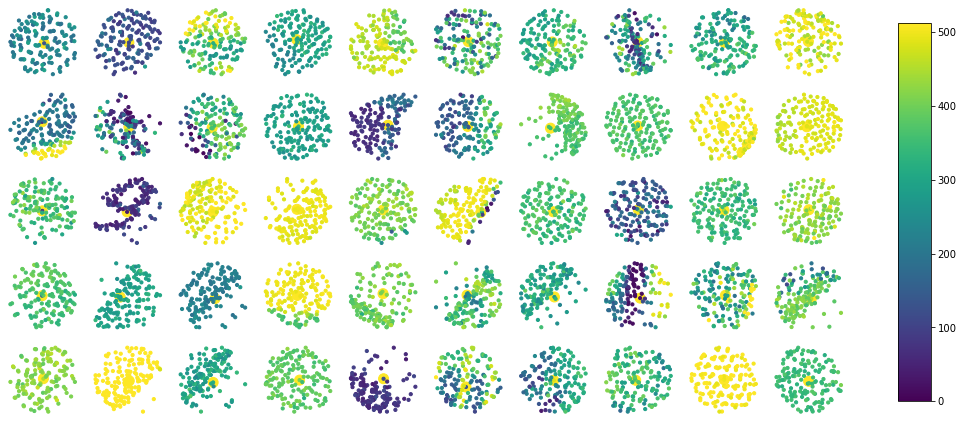

In [4]:
# Visualize Intenties
fig, ax = plt.subplots(y, x)
for i in range(y):
    for j in range(x):
        example = np.load(df['train'].iloc[sample[j, i]][1])
        # Adjust the gt-center to be more visible
        center = np.ones((example.shape[0])) * 10
        center[0] = 100
        intensity = example[:, 3]
        intensity[0] = 512
        s = ax[i][j].scatter(example[:, 0], example[:, 1], s=center, c=example[:, 3], vmin=0, vmax=512)
        ax[i][j].axis('off')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

train


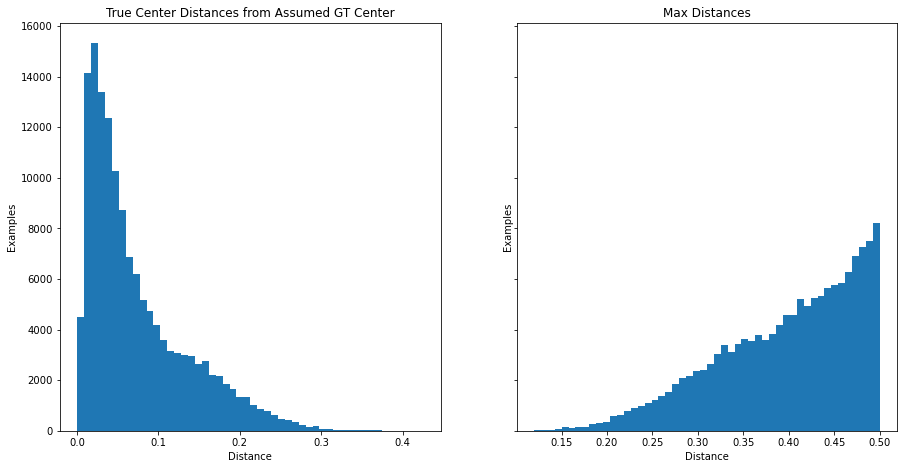

val


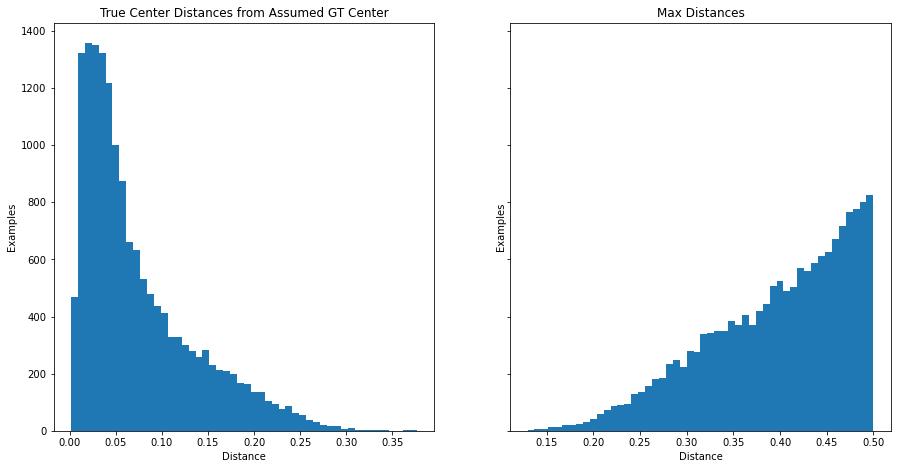

test


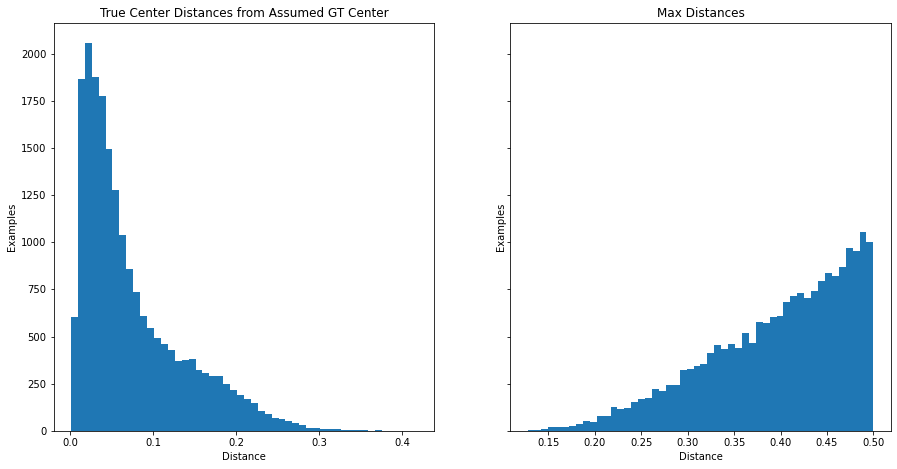

In [71]:
# Measure how close the gt-center is to the center. Does centerpoint center-y-ness matter?

for key, value in df.items():
    print(key)
    curr_df = df[key]
    means = []
    stds = []
    maxes = []
    for i in range(len(curr_df)):
        ex = np.load(curr_df.iloc[i][1])
        # center to make everything uniform
        ex[:, :3] -= ex[0, :3]
        # get mean for spatial axes. The first two points are the ground center and alt-copy
        # since the ground truth is at (0,0,0), the value of the mean of the other points is
        # a measure of the distance the true center is away from the gt-center
        
        center_mean = np.mean(ex[2:, :3], axis=0)
        center_std = np.std(ex[2:, :3], axis=0)
        means.append(center_mean)
        stds.append(center_std)
        
        # figure out what the largest distance is
        # -- there is probably a better way to do this, this takes forever.
        my_max = -10e6
        for j in range(len(ex)):
            curr_max = np.linalg.norm(ex[j, :3])
            if curr_max > my_max:
                my_max = curr_max
        maxes.append(curr_max)
                    
    means = np.array(means)
    stds = np.array(stds)
    maxes = np.array(maxes)

    distances = [np.linalg.norm(m) for m in means]
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(distances, 50)
    ax1.set_title("True Center Distances from Assumed GT Center")
    ax1.set_xlabel("Distance")
    ax1.set_ylabel("Examples")
    ax2.hist(maxes, 50)
    ax2.set_title("Max Distances")
    ax2.set_xlabel("Distance")
    ax2.set_ylabel("Examples")
    plt.show()

# dmax=.5
# coordinate system = linear meter

train
(143055,)
val
(15951,)
test
(19939,)


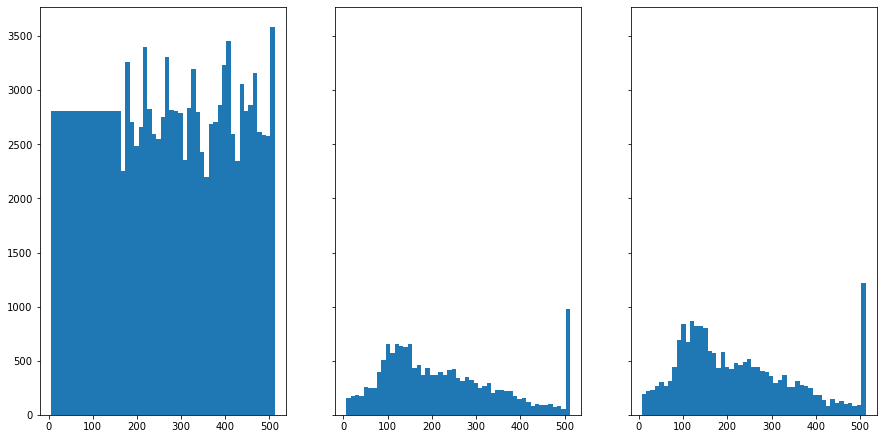

In [70]:
# Distribution of Intensities
intensities = {}
for key, value in df.items():
    print(key)
    curr_df = df[key]
    intensities[key] = []
    for i in range(len(curr_df)):
        ex = np.load(curr_df.iloc[i][1])
        intensities[key].append(ex[0, 3])
        
    intensities[key] = np.array(intensities[key])
    intensities[key] = intensities[key].flatten()
    print(intensities[key].shape)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.hist(intensities['train'], 51)
ax2.hist(intensities['val'], 51)
ax3.hist(intensities['test'], 51)
plt.show()

# I'm not sure why there's such a huge spike at 510-515, perhaps this needs to be filtered.
# The training data doesn't seem as balanced as I would like. 

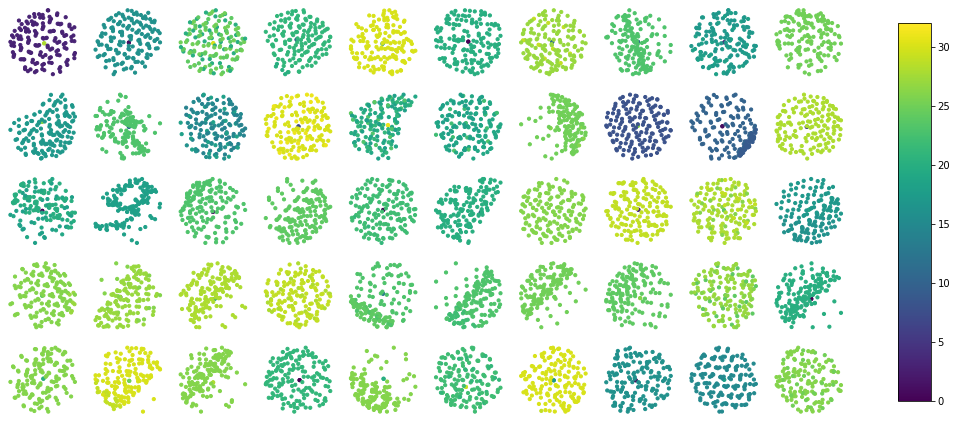

In [7]:
# Visualize Scan Angle Rank 
fig, ax = plt.subplots(y, x)

# Scan Angle Rank Ranges by dataset:
# train: 32.0, -14.0
# val: 3, -18
# test: 26, 22 
# hmm...

for i in range(y):
    for j in range(x):
        example = np.load(df['train'].iloc[sample[j, i]][1])
        # Adjust the "center" to be more visible
        s = ax[i][j].scatter(example[:, 0], example[:, 1], s=10, c=abs(example[:, 4]), vmin=0, vmax=32)
        ax[i][j].axis('off')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

# The middle point will be different since it comes from a different scan!

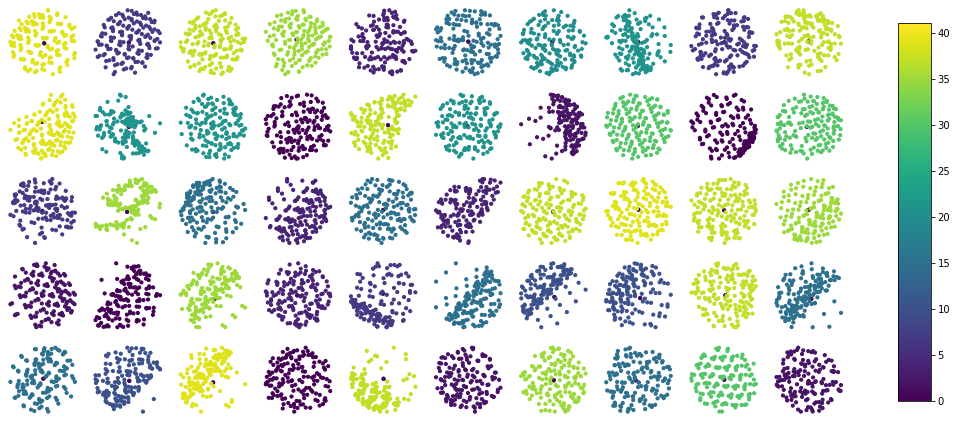

In [25]:
# Visualize Flight Number 
fig, ax = plt.subplots(y, x)

# Scan Angle Rank Ranges by dataset:
# train: 32.0, -14.0
# val: 3, -18
# test: 26, 22 
# hmm...

for i in range(y):
    for j in range(x):
        example = np.load(df['train'].iloc[sample[j, i]][1])
        # Adjust the "center" to be more visible
        s = ax[i][j].scatter(example[:, 0], example[:, 1], s=10, c=abs(example[:, 8]), vmin=0, vmax=41)
        ax[i][j].axis('off')

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

# The middle point will be different since it comes from a different scan!

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]


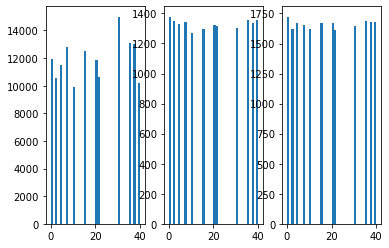

In [95]:
# Balancing Examples by Flight Number (undersampled)
my_bins = df['train'].flight_num.unique()
my_bins.sort()
my_bins = np.concatenate((my_bins, np.array([40])))
my_bins = np.arange(41)
print(my_bins)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.hist(df['train'].flight_num.values, my_bins)
ax2.hist(df['val'].flight_num.values, my_bins)
ax3.hist(df['test'].flight_num.values, my_bins)
plt.show()

In [97]:
# Is there a relationship between scan angle and intensity
intensities = {}
scan_angle = {}
for key, value in df.items():
    print(key)
    curr_df = df[key]
    intensities[key] = []
    scan_angle[key] = []
    for i in range(len(curr_df)):
        ex = np.load(curr_df.iloc[i][1])
        intensities[key].append(ex[0, 3])
        scan_angle[key].append(ex[0, 4])
        
    intensities[key] = np.array(intensities[key])
    intensities[key] = intensities[key].flatten()
    scan_angle[key] = np.array(scan_angle[key])
    scan_angle[key] = scan_angle[key].flatten()
    print(intensities[key].shape)





train
(143055,)
val
(15951,)
test
(19939,)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510]


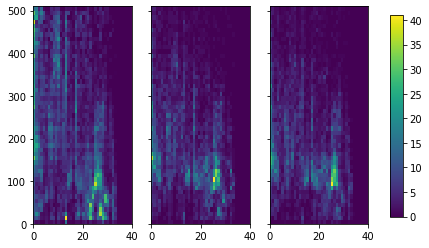

In [96]:
# Plots:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
my_bins2 = [i for i in range(0, 520, 10)]
print(my_bins)
print(my_bins2)
ax1.hist2d(scan_angle['train'], intensities['train'], bins=[my_bins, my_bins2])
ax2.hist2d(scan_angle['val'], intensities['val'], bins=[my_bins, my_bins2])
ax3.hist2d(scan_angle['test'], intensities['test'], bins=[my_bins, my_bins2])

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
fig.colorbar(s, cax=cbar_ax)

plt.show()

In [118]:
# Some stats about normals (channels 6, 7, 8)
normals = {}
for key, value in df.items():
    print(key)
    curr_df = df[key]
    normals[key] = []
    for i in range(len(curr_df)):
        ex = np.load(curr_df.iloc[i][1])
        normals[key].append(ex[:, 5:8])

train
val
test


In [120]:
print(len(normals['train']))
print(np.array(normals['train']).shape)
print(np.max(np.array(normals['train']), axis=None))
print(np.min(np.array(normals['train'])))

143055
(143055, 152, 3)
0.9999999999038585
-0.9999996582826993
